<a href="https://colab.research.google.com/github/elangbijak4/Testing_-_Exploration_4_Quantum_Machine/blob/main/Rev1_Oracle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  cirq

In [ ]:
!pip install cirq --upgrade  # Upgrade Cirq to the latest version

In [4]:
import cirq
import matplotlib.pyplot as plt

Oracle dengan Register:
0: ───×───
      │
2: ───×───
measurements: (no measurements)

qubits: (cirq.LineQubit(0),)
output vector: |0⟩

qubits: (cirq.LineQubit(2),)
output vector: |0⟩

phase:
output vector: |⟩

Oracle tanpa Register:
0: ───X───
measurements: (no measurements)

qubits: (cirq.LineQubit(0),)
output vector: |1⟩

phase:
output vector: |⟩

Oracle dengan Measurement:
0: ───M('measurement')───
measurements: measurement=0

qubits: (cirq.LineQubit(0),)
output vector: |0⟩

phase:
output vector: |⟩


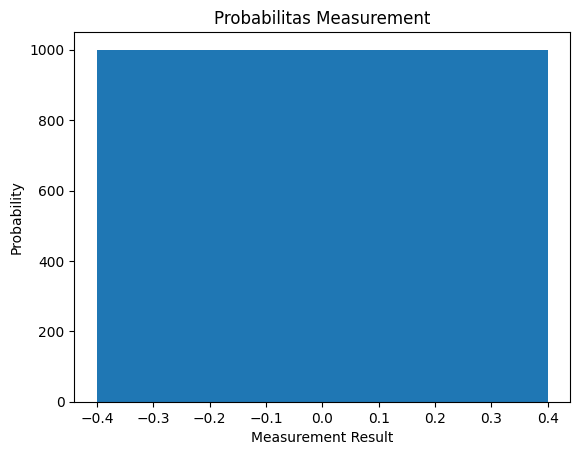


Oracle tanpa Measurement:
0: ───×───
      │
1: ───×───
measurements: (no measurements)

qubits: (cirq.LineQubit(0),)
output vector: |0⟩

qubits: (cirq.LineQubit(1),)
output vector: |0⟩

phase:
output vector: |⟩


In [8]:
# 1. Oracle dengan Register
def oracle_register(qubits):
    """
    Oracle sederhana yang menukar nilai qubit pertama dan terakhir dalam register.
    """
    yield cirq.SWAP(qubits[0], qubits[-1])

# 2. Oracle tanpa Register
def oracle_no_register(q):
    """
    Oracle sederhana yang membalik nilai qubit.
    """
    yield cirq.X(q)

# 3. Oracle dengan Measurement
def oracle_measurement(qubits):
    """
    Oracle yang mengukur nilai qubit pertama dan mengembalikan hasilnya.
    """
    yield cirq.measure(qubits[0], key='measurement')

# 4. Oracle tanpa Measurement
def oracle_no_measurement(qubits):
    """
    Oracle yang menukar nilai qubit pertama dan kedua tanpa pengukuran.
    """
    yield cirq.SWAP(qubits[0], qubits[1])


# Uji coba
# Inisialisasi qubit
qubits = cirq.LineQubit.range(3)

# Buat circuit untuk setiap oracle
circuit_register = cirq.Circuit(oracle_register(qubits))
circuit_no_register = cirq.Circuit(oracle_no_register(qubits[0]))
circuit_measurement = cirq.Circuit(oracle_measurement(qubits))
circuit_no_measurement = cirq.Circuit(oracle_no_measurement(qubits))

# Simulasi dan cetak hasil
simulator = cirq.Simulator()

# Oracle dengan Register
print("Oracle dengan Register:")
print(circuit_register)
#circuit_register.draw(figsize=(5, 3))  # Menampilkan gambar sirkuit
plt.show()

result_register = simulator.simulate(circuit_register)
print(result_register)

# Oracle tanpa Register
print("\nOracle tanpa Register:")
print(circuit_no_register)
#circuit_no_register.draw(figsize=(5, 3))  # Menampilkan gambar sirkuit
plt.show()

result_no_register = simulator.simulate(circuit_no_register)
print(result_no_register)

# Oracle dengan Measurement
print("\nOracle dengan Measurement:")
print(circuit_measurement)
#circuit_measurement.draw(figsize=(5, 3))  # Menampilkan gambar sirkuit
plt.show()

result_measurement = simulator.simulate(circuit_measurement)
print(result_measurement)

# Simulate the circuit with repetitions to get measurement results
samples = simulator.run(circuit_measurement, repetitions=1000) # Run the simulation with 1000 repetitions

# Get the histogram of measurement results
histogram = samples.histogram(key='measurement')

plt.bar(histogram.keys(), histogram.values())
plt.xlabel("Measurement Result")
plt.ylabel("Probability")
plt.title("Probabilitas Measurement")
plt.show()

# Oracle tanpa Measurement
print("\nOracle tanpa Measurement:")
print(circuit_no_measurement)
#circuit_no_measurement.draw(figsize=(5, 3))  # Menampilkan gambar sirkuit
plt.show()

result_no_measurement = simulator.simulate(circuit_no_measurement)
print(result_no_measurement)